# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
import api_keys1

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
#Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
appid = wkey
settings = {"units": "imperial", "appid": wkey}
url = f"{url}appid={wkey}&units={units}"

In [39]:
# List of city data
city_data = []

from six.moves import urllib



# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yellowknife
Processing Record 2 of Set 1 | pochutla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pochutla
Processing Record 3 of Set 1 | gorontalo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=gorontalo
Processing Record 4 of Set 1 | marcona
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=marcona
City not found...
Processing Record 5 of Set 1 | henties bay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=henties%20bay
Processing Record 6 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ushuai

City not found...
Processing Record 4 of Set 2 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port%20hardy
Processing Record 5 of Set 2 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tiksi
Processing Record 6 of Set 2 | wamba
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=wamba
Processing Record 7 of Set 2 | east london
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=east%20london
Processing Record 8 of Set 2 | mineiros
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mineiros
Processing Record 9 of Set 2 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=srednekolymsk
Processing Record 10 of Set 2 | campos do jordao
http://ap

Processing Record 7 of Set 3 | saleaula
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saleaula
City not found...
Processing Record 8 of Set 3 | san patricio
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san%20patricio
Processing Record 9 of Set 3 | sakaiminato
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sakaiminato
Processing Record 10 of Set 3 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ribeira%20grande
Processing Record 11 of Set 3 | tondi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tondi
Processing Record 12 of Set 3 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=havre-saint-pierre
Processing Record 13 of

Processing Record 11 of Set 4 | lisakovsk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lisakovsk
Processing Record 12 of Set 4 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=carnarvon
Processing Record 13 of Set 4 | kovdor
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kovdor
Processing Record 14 of Set 4 | bafq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bafq
Processing Record 15 of Set 4 | port augusta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port%20augusta
Processing Record 16 of Set 4 | vanimo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vanimo
Processing Record 17 of Set 4 | sorland
http://api.openweathermap.org/data/2.5/weath

Processing Record 15 of Set 5 | changji
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=changji
Processing Record 16 of Set 5 | vardo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vardo
Processing Record 17 of Set 5 | buraydah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=buraydah
Processing Record 18 of Set 5 | salinopolis
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=salinopolis
Processing Record 19 of Set 5 | mago
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mago
Processing Record 20 of Set 5 | awjilah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=awjilah
Processing Record 21 of Set 5 | luleburgaz
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 21 of Set 6 | kailua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kailua
Processing Record 22 of Set 6 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=chuy
Processing Record 23 of Set 6 | pevek
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pevek
Processing Record 24 of Set 6 | kirovsk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kirovsk
Processing Record 25 of Set 6 | sibolga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sibolga
Processing Record 26 of Set 6 | nador
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nador
Processing Record 27 of Set 6 | oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f

Processing Record 25 of Set 7 | sept-iles
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sept-iles
Processing Record 26 of Set 7 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lazaro%20cardenas
Processing Record 27 of Set 7 | honiara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=honiara
Processing Record 28 of Set 7 | waidhofen
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=waidhofen
Processing Record 29 of Set 7 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=coihaique
Processing Record 30 of Set 7 | axim
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=axim
Processing Record 31 of Set 7 | kidal
http://api.openweathermap.org/da

Processing Record 29 of Set 8 | vysokogornyy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vysokogornyy
Processing Record 30 of Set 8 | flinders
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=flinders
Processing Record 31 of Set 8 | maceio
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=maceio
Processing Record 32 of Set 8 | whitecourt
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=whitecourt
Processing Record 33 of Set 8 | half moon bay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=half%20moon%20bay
Processing Record 34 of Set 8 | arawa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=arawa
Processing Record 35 of Set 8 | bystryy istok
http://api.openweath

Processing Record 35 of Set 9 | tautira
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tautira
Processing Record 36 of Set 9 | bundaberg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bundaberg
Processing Record 37 of Set 9 | umba
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=umba
Processing Record 38 of Set 9 | cairns
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cairns
Processing Record 39 of Set 9 | sorong
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sorong
Processing Record 40 of Set 9 | valdivia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=valdivia
Processing Record 41 of Set 9 | tidore
http://api.openweathermap.org/data/2.5/weather?appid=25bc90

Processing Record 39 of Set 10 | ishigaki
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ishigaki
Processing Record 40 of Set 10 | port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port%20lincoln
Processing Record 41 of Set 10 | kyaikto
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kyaikto
Processing Record 42 of Set 10 | stamsund
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=stamsund
City not found...
Processing Record 43 of Set 10 | linxi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=linxi
Processing Record 44 of Set 10 | bella union
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bella%20union
Processing Record 45 of Set 10 | sarab
http://ap

City not found...
Processing Record 44 of Set 11 | baykit
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=baykit
Processing Record 45 of Set 11 | asosa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=asosa
Processing Record 46 of Set 11 | creel
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=creel
Processing Record 47 of Set 11 | ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ixtapa
Processing Record 48 of Set 11 | terrace
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=terrace
Processing Record 49 of Set 11 | novyy urengoy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=novyy%20urengoy
Processing Record 0 of Set 12 | buluang
http://api.openweathermap.or

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Export the City_Data into a csv
city_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)


# Show Record Count
city_data_pd.count()

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [43]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.46,-114.35,23.00,85,20,6.93,CA,1603249924
1,pochutla,15.74,-96.47,78.01,93,91,3.09,MX,1603250313
2,gorontalo,0.54,123.06,88.79,52,38,8.70,ID,1603250180
3,henties bay,-22.12,14.28,57.99,86,2,1.01,NA,1603249978
4,ushuaia,-54.80,-68.30,41.00,75,40,5.12,AR,1603249925


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
#  Get the indices of cities that have humidity over 100%.


In [41]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

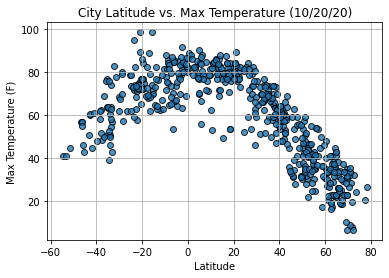

In [45]:
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

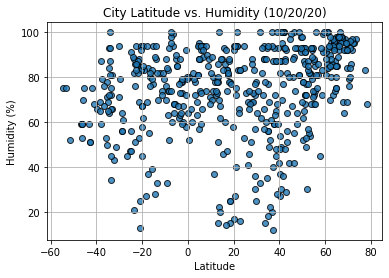

In [47]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Latitude vs Humidity (%).png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

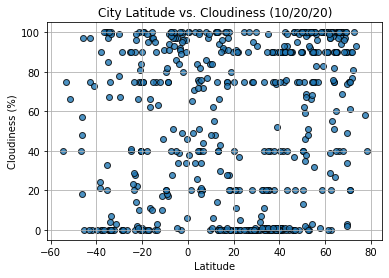

In [48]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Latitude vs Cloudiness (%).png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

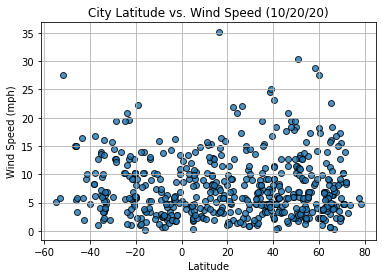

In [49]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Latitude vs Wind Speed (MPH).png")

# Show plot
plt.show()